# Importing the 2 Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  numpy as np

In [2]:
df_red = pd.read_csv(r"C:\Users\dimma\OneDrive\Υπολογιστής\Ο.Π.Α\Supervised Learning\2η Εργασια\wine+quality\winequality-red.csv",sep=";", decimal="." )
df_white = pd.read_csv(r"C:\Users\dimma\OneDrive\Υπολογιστής\Ο.Π.Α\Supervised Learning\2η Εργασια\wine+quality\winequality-white.csv",sep=";", decimal="." )

# We start the EDA with the red wines

In [3]:
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_red.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,2.208702,3.311113,0.658149,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,9.664060,0.154386,0.169507,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,100.369000,4.010000,2.000000,8.000000


In [5]:
df_red.info() #We have no null values and all the features are in the right Dtype except alcohol

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   object 
 11  quality               1599 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 150.0+ KB


In [6]:
df_red['alcohol'].unique() 

array(['9.4', '9.8', '10', '9.5', '10.5', '9.2', '9.9', '9.1', '9.3', '9',
       '9.7', '10.1', '10.6', '9.6', '10.8', '10.3', '13.1', '10.2',
       '10.9', '10.7', '12.9', '10.4', '13', '14', '11.5', '11.4', '12.4',
       '11', '12.2', '12.8', '12.6', '12.5', '11.7', '11.3', '12.3', '12',
       '11.9', '11.8', '8.7', '13.3', '11.2', '11.6', '11.1', '13.4',
       '12.1', '8.4', '12.7', '14.9', '13.2', '13.6', '13.5',
       '100.333.333.333.333', '9.55', '8.5', '110.666.666.666.667',
       '956.666.666.666.667', '10.55', '8.8', '135.666.666.666.667',
       '11.95', '9.95', '923.333.333.333.333', '9.25', '9.05', '10.75'],
      dtype=object)

In [7]:
#We transform the alcohol into float
df_red['alcohol'] = pd.to_numeric(df_red['alcohol'], errors='coerce')

In [8]:
alcohol_median = df_red['alcohol'].median()               #We did that because during the training of the algorithm we found out that some values where NaN since we had coerce in errors
df_red['alcohol'] = df_red['alcohol'].fillna(alcohol_median)

# Univariate Analysis

In [8]:
df_red.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [43]:
#We create a function to use for each numeric feature

def histogram_boxplot(df_red, column, bins=8, color='green', figsize=(10, 7)):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)

    # Histogram
    df_red[column].hist(bins=bins, ax=ax1, color=color, edgecolor='black')
    ax1.set_title(f'{column} - Histogram')

    # Boxplot
    df_red.boxplot(column=column, ax=ax2, vert=False)
    ax2.set_title(f'{column} - Boxplot')

    plt.tight_layout()
    plt.show()

In [44]:
# We create a function to detect outliers
def detect_outliers(df_red, column_name):
# Calculating Q1, Q2, IQR
    Q1 = df_red[column_name].quantile(0.25)
    Q3 = df_red[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Setting Boundaries
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # We detect the Outliers
    outliers_mask = (df_red[column_name] < lower) | (df_red[column_name] > upper)

    # Calculate the sum, and percentage of outliers
    outliers_count = outliers_mask.sum()
    total_count = len(df_red)
    outliers_percentage = (outliers_count / total_count) * 100

    print(f"Column: '{column_name}'")
    print(f"- Number of outliers: {outliers_count}")
    print(f"- Percentage of outliers: {outliers_percentage:.2f}%")
    print("-" * 30)



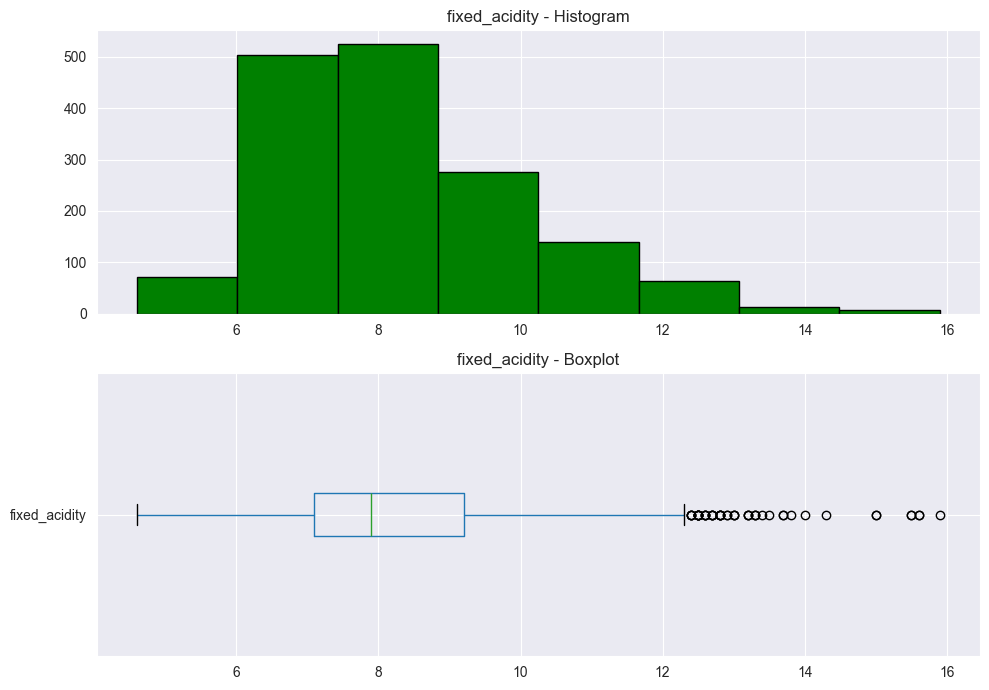

In [45]:
histogram_boxplot(df_red, 'fixed_acidity')

In [46]:
detect_outliers(df_red, 'fixed_acidity')

Column: 'fixed_acidity'
- Number of outliers: 49
- Percentage of outliers: 3.06%
------------------------------


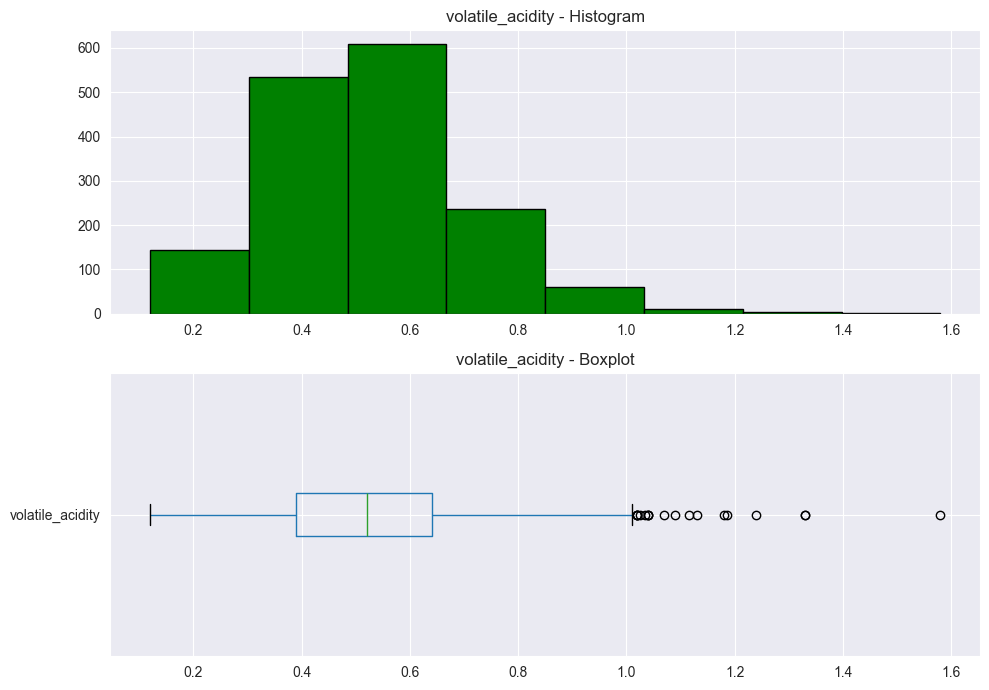

In [47]:
histogram_boxplot(df_red,"volatile_acidity")

In [48]:
detect_outliers(df_red, 'volatile_acidity')

Column: 'volatile_acidity'
- Number of outliers: 19
- Percentage of outliers: 1.19%
------------------------------


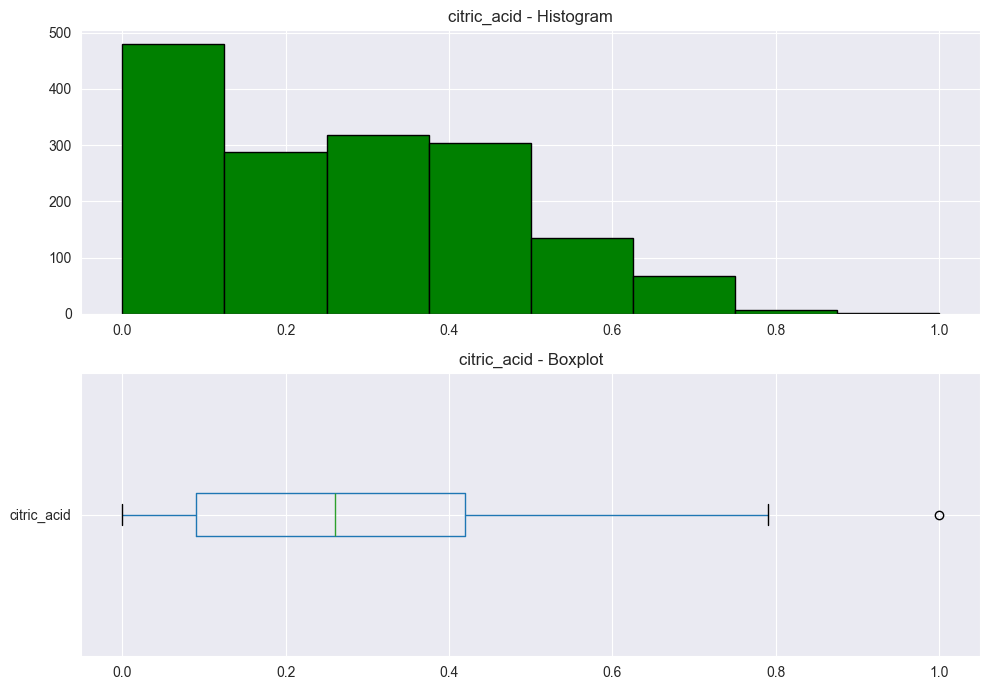

In [49]:
histogram_boxplot(df_red, 'citric_acid')

In [50]:
detect_outliers(df_red, 'citric_acid')

Column: 'citric_acid'
- Number of outliers: 1
- Percentage of outliers: 0.06%
------------------------------


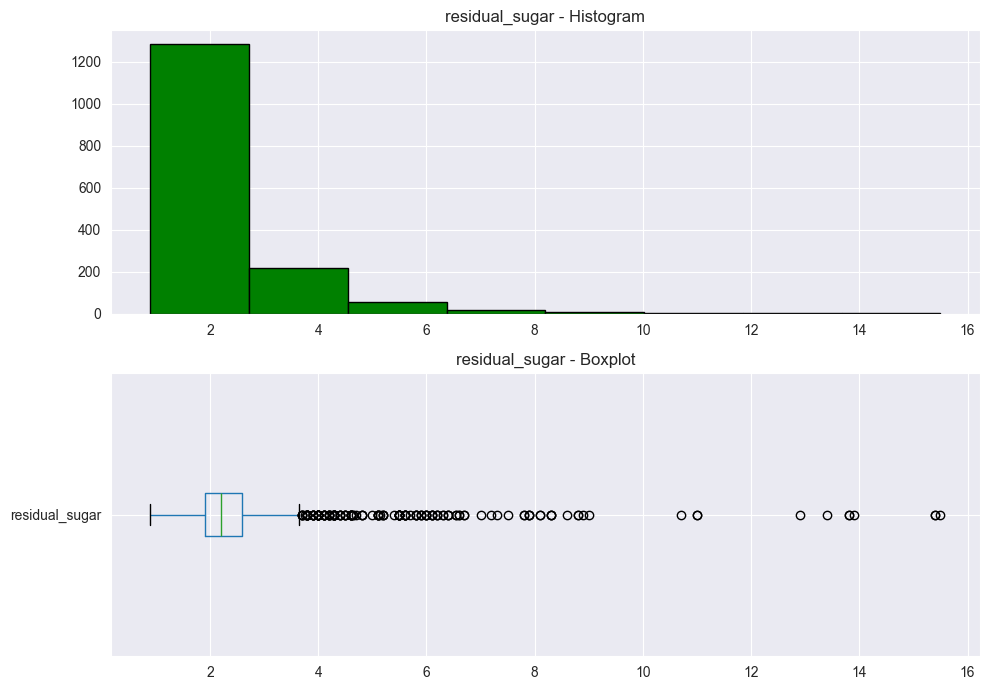

In [51]:
histogram_boxplot(df_red, 'residual_sugar')

In [52]:
detect_outliers(df_red, 'residual_sugar')

Column: 'residual_sugar'
- Number of outliers: 155
- Percentage of outliers: 9.69%
------------------------------


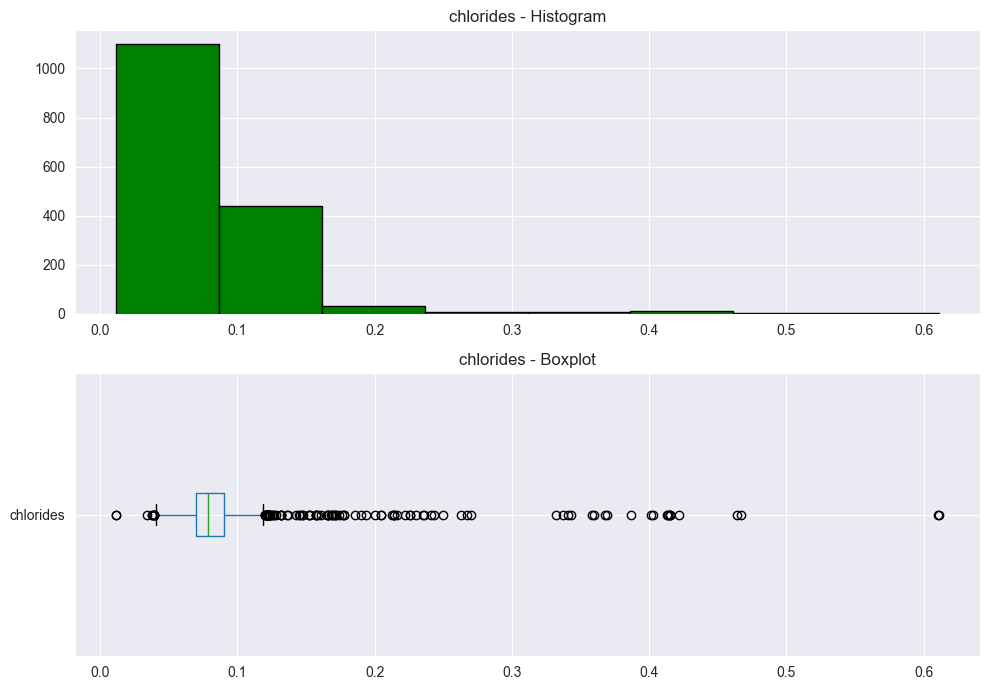

In [53]:
histogram_boxplot(df_red,'chlorides')

In [54]:
detect_outliers(df_red, 'chlorides')

Column: 'chlorides'
- Number of outliers: 112
- Percentage of outliers: 7.00%
------------------------------


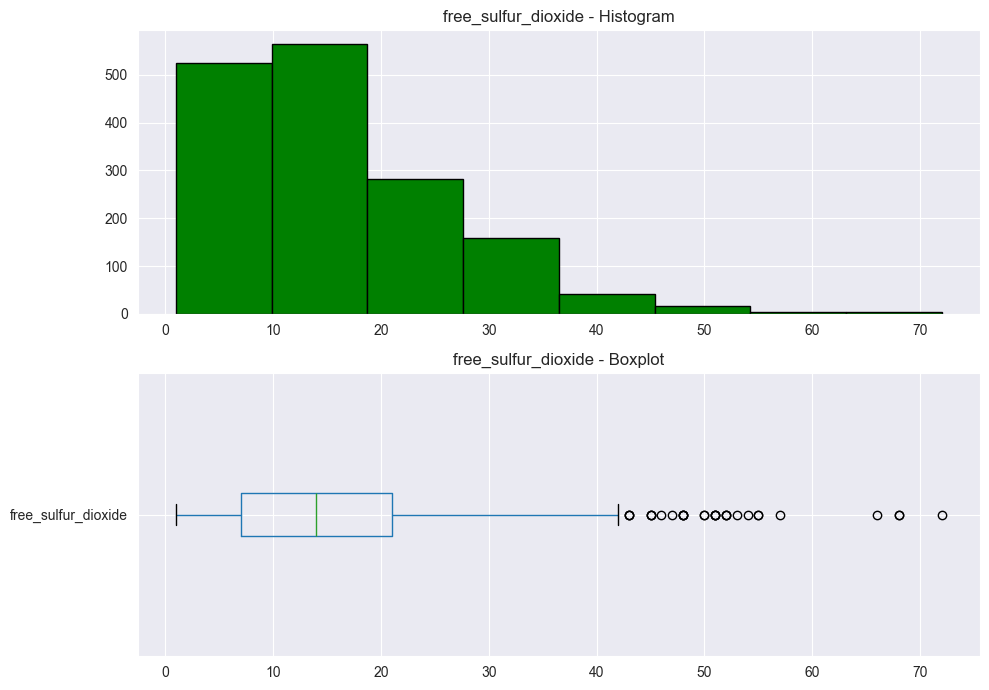

In [55]:
histogram_boxplot(df_red,'free_sulfur_dioxide')

In [56]:
detect_outliers(df_red, 'free_sulfur_dioxide')

Column: 'free_sulfur_dioxide'
- Number of outliers: 30
- Percentage of outliers: 1.88%
------------------------------


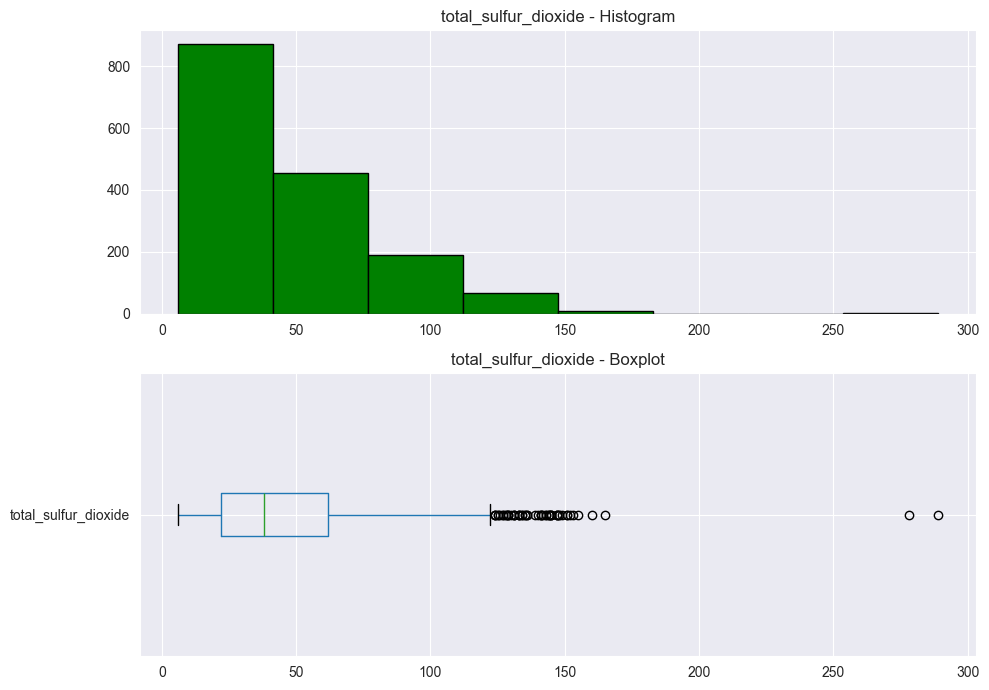

In [57]:
histogram_boxplot(df_red,'total_sulfur_dioxide')

In [58]:
detect_outliers(df_red, 'total_sulfur_dioxide')

Column: 'total_sulfur_dioxide'
- Number of outliers: 55
- Percentage of outliers: 3.44%
------------------------------


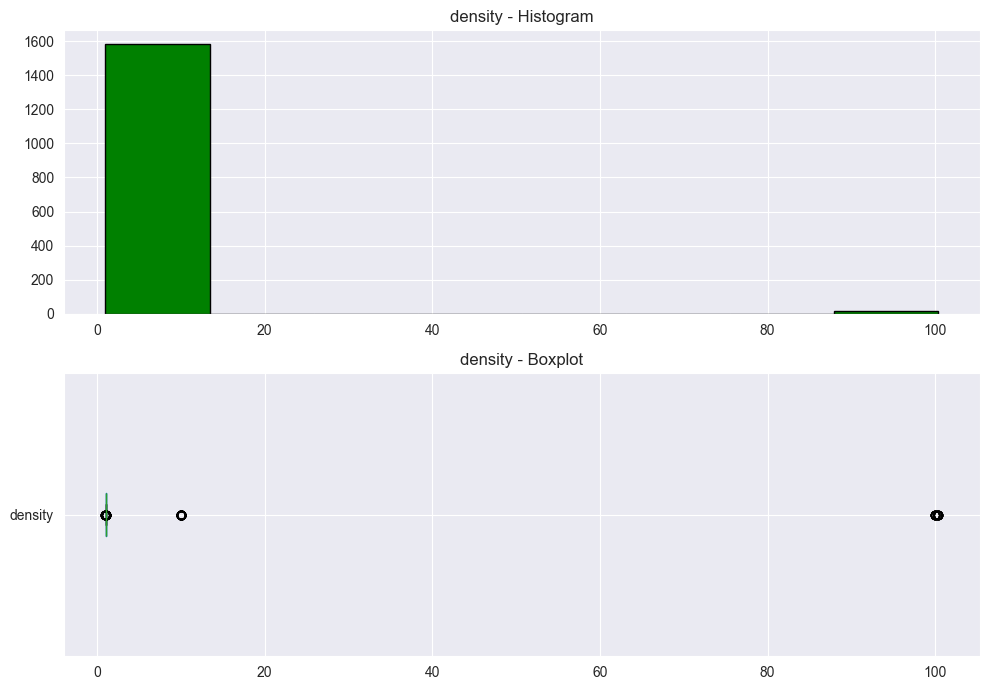

In [59]:
histogram_boxplot(df_red,'density')

In [60]:
detect_outliers(df_red, 'density')

Column: 'density'
- Number of outliers: 86
- Percentage of outliers: 5.38%
------------------------------


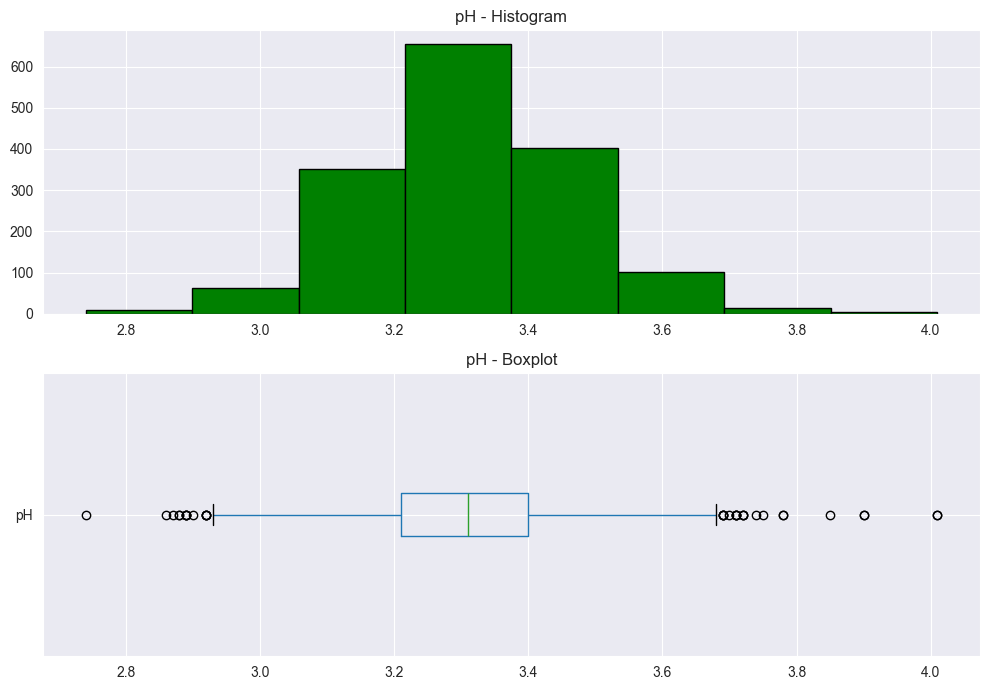

In [61]:
histogram_boxplot(df_red,'pH')

In [62]:
detect_outliers(df_red, 'pH')

Column: 'pH'
- Number of outliers: 35
- Percentage of outliers: 2.19%
------------------------------


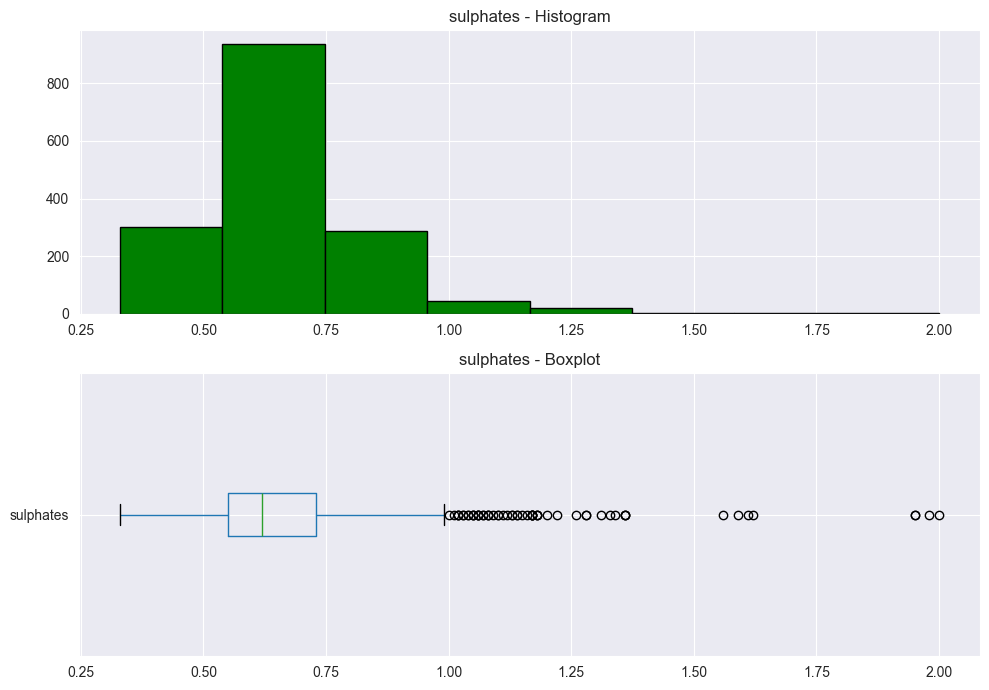

In [63]:
histogram_boxplot(df_red,'sulphates')

In [64]:
detect_outliers(df_red, 'sulphates')

Column: 'sulphates'
- Number of outliers: 59
- Percentage of outliers: 3.69%
------------------------------


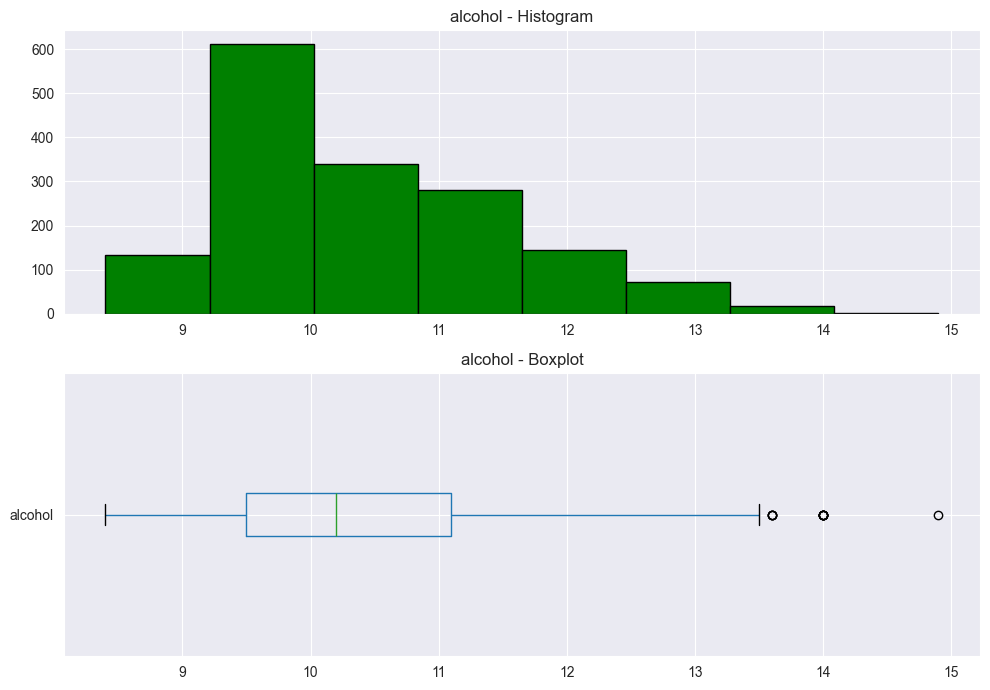

In [65]:
histogram_boxplot(df_red,'alcohol')

In [66]:
detect_outliers(df_red, 'alcohol')

Column: 'alcohol'
- Number of outliers: 12
- Percentage of outliers: 0.75%
------------------------------


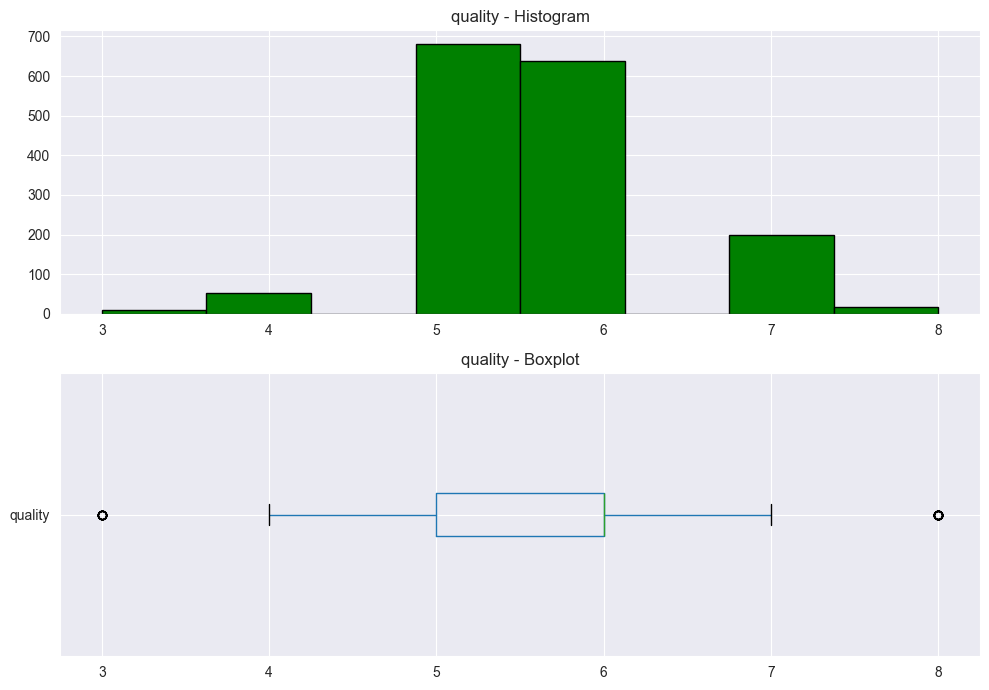

In [67]:
histogram_boxplot(df_red,'quality')

In [68]:
detect_outliers(df_red, 'quality')

Column: 'quality'
- Number of outliers: 28
- Percentage of outliers: 1.75%
------------------------------


In [69]:
df_red.value_counts('quality').sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

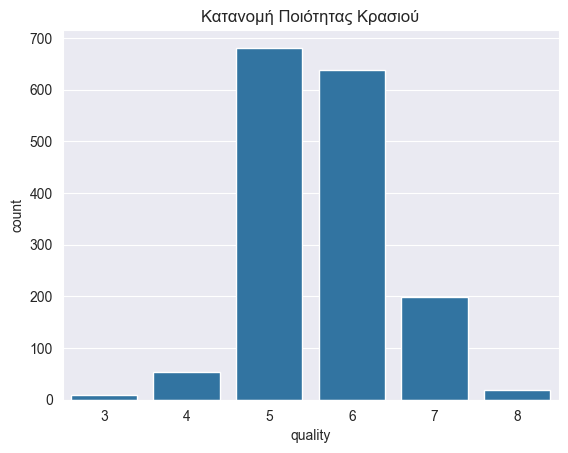

In [70]:
#We make a barplot to see the distribution of the Quality in the Red Wines
sns.countplot(x='quality', data=df_red)
plt.title('Κατανομή Ποιότητας Κρασιού')
plt.show()

# Multivariate Analysis

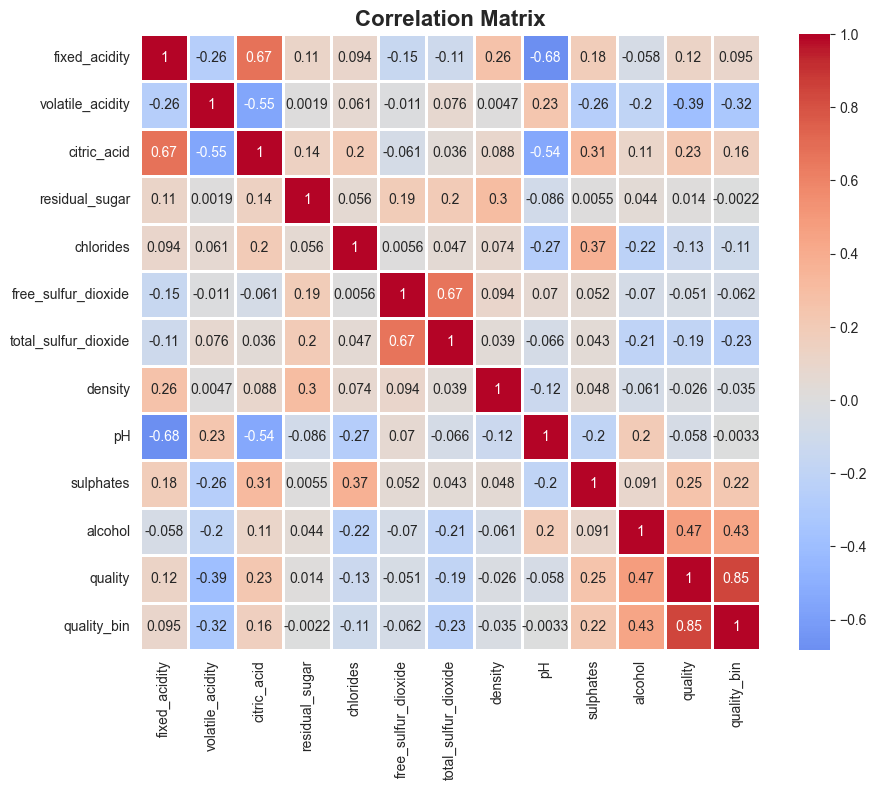

In [71]:
#We create the Correlation Matrix between the features
plt.figure(figsize=(10, 8))
sns.heatmap(df_red.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0, linewidths=1)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()

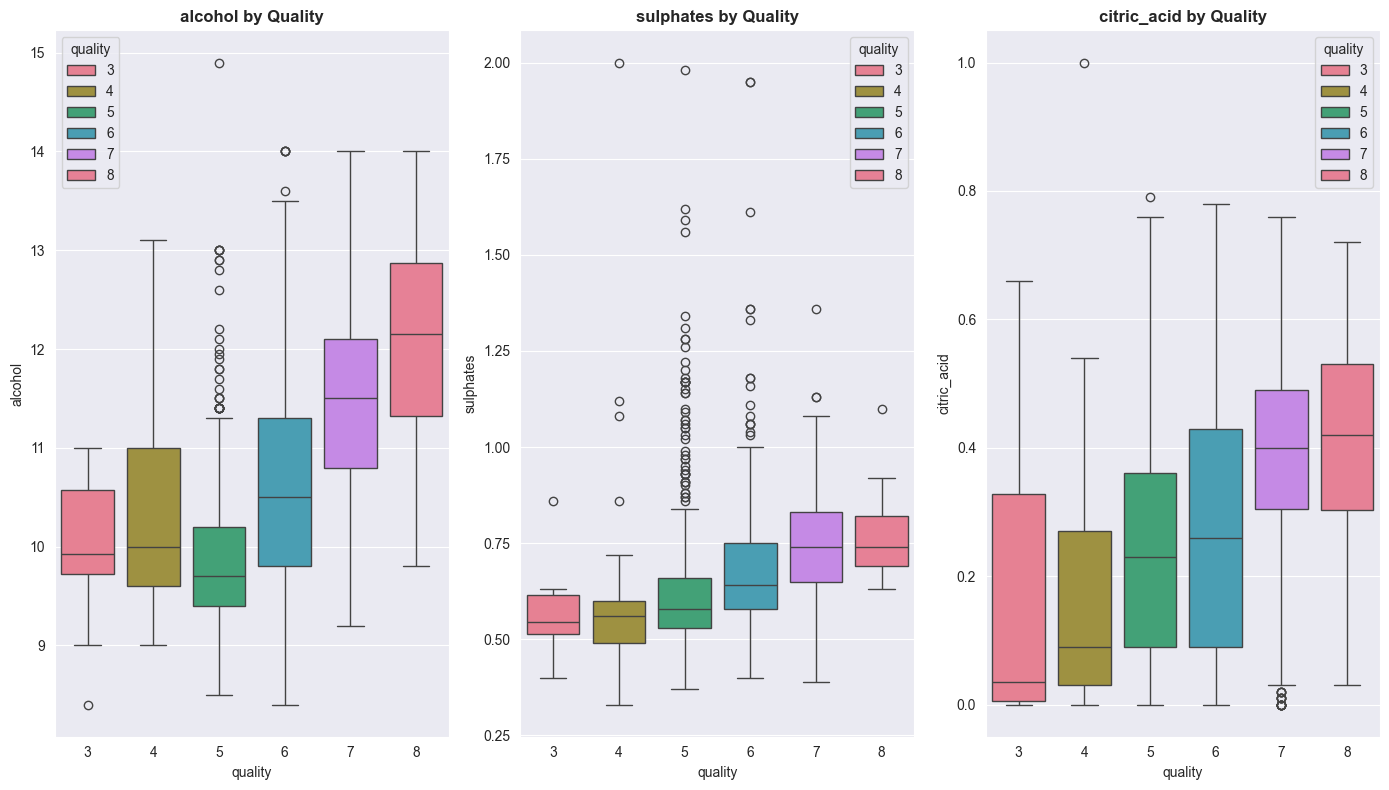

In [72]:
#We make a combined boxplot of the features which seems to have a positive correlation with the quality. The feature alcohol has the highest correlation with 0,48
num_cols = ['alcohol','sulphates','citric_acid']

fig, axes = plt.subplots(1, 3, figsize=(14, 8))
axes = axes.ravel()
for i, col in enumerate(num_cols):
    sns.boxplot(data=df_red, x='quality', y=col, ax=axes[i], palette='husl', hue='quality')
    axes[i].set_title(f'{col} by Quality', fontweight='bold')
plt.tight_layout()
plt.show()

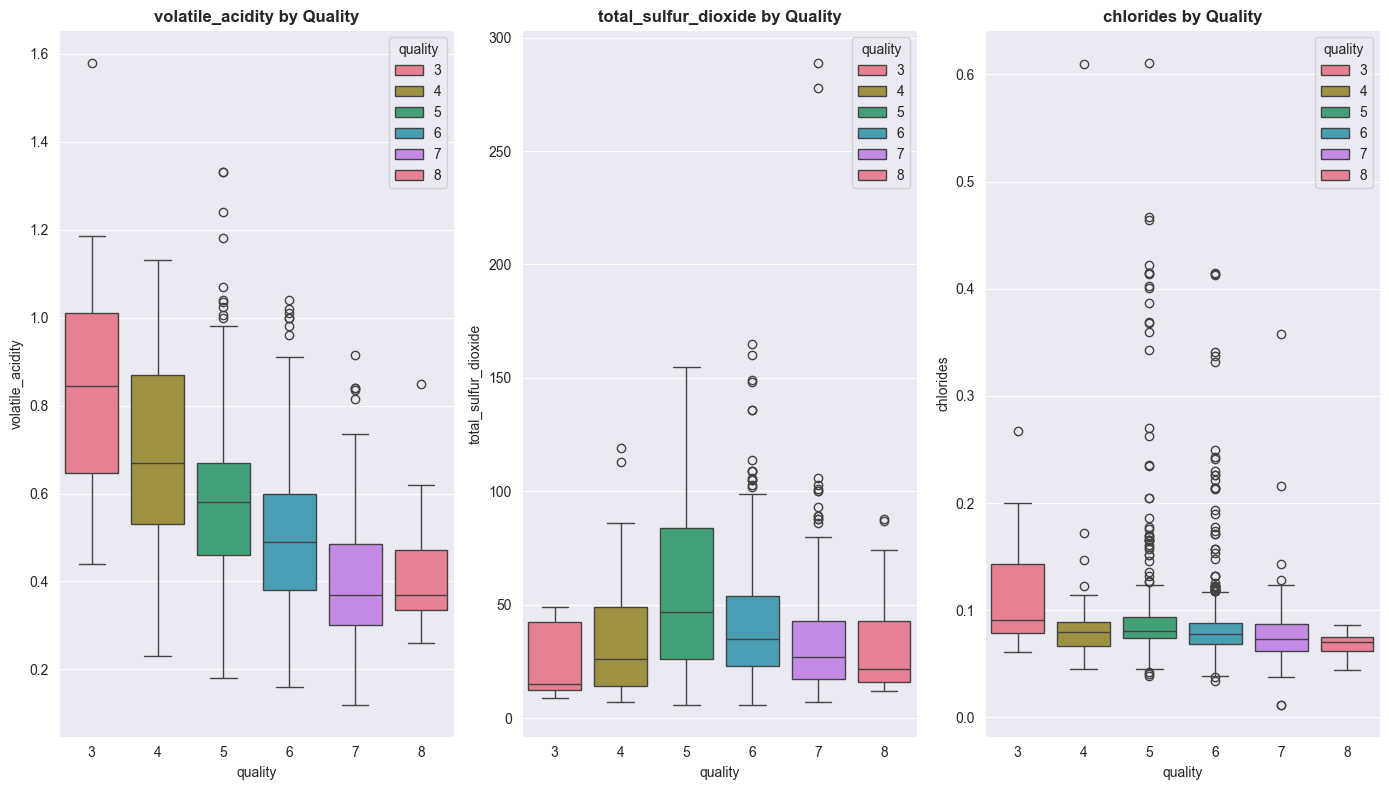

In [73]:
#We make a combined boxplot of the features which seems to have a negative correlation with the quality. The feature volatile acidity has the most negative correlation with 0,48
num_cols = ['volatile_acidity','total_sulfur_dioxide','chlorides']

fig, axes = plt.subplots(1, 3, figsize=(14, 8))
axes = axes.ravel()
for i, col in enumerate(num_cols):
    sns.boxplot(data=df_red, x='quality', y=col, ax=axes[i], palette='husl', hue='quality')
    axes[i].set_title(f'{col} by Quality', fontweight='bold')
plt.tight_layout()
plt.show()

# Splitting and Scaling the Dataset
- We prefer to use the Robust Scaler which uses Median an IQR. As we saw in the Univariate Analysis many features have a few  outliers. The dataset is small so perhaps better to keep them, as they correspond in real data.
-  Also is better to make a binary encoding with 0 if quality is between 0 and 6 and 1 if quality between 6 and 10. We prefer binary encoding because here the 0 & 1 represent and a greater value

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [10]:
# We make a binary encoding
df_red['quality_bin'] = df_red['quality'].apply(lambda x: 1 if x >= 6 else 0) #We set a threshold of x>=6 to make the dataset more balanced

In [11]:
df_red['quality_label'] = df_red['quality_bin'].map({0: 'Bad', 1: 'Good'}) #We give labels 0=Bad, 1=Good

quality_label
Good    855
Bad     744
Name: count, dtype: int64


<Axes: xlabel='quality_label', ylabel='count'>

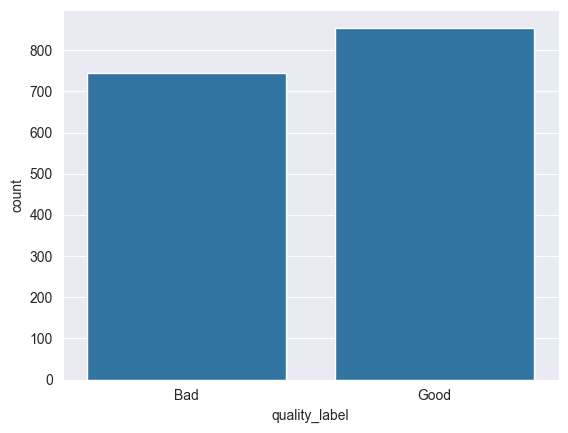

In [12]:
print(df_red['quality_label'].value_counts())
sns.countplot(x='quality_label', data=df_red)


In [13]:
df_red.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_bin',
       'quality_label'],
      dtype='object')

In [14]:
X = df_red.drop(['quality','quality_bin','quality_label'], axis=1)   # y is our binary target column, We drop the other quality columns to avoid Data Leakage
y = df_red['quality_bin']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [16]:
#Implementing the Robust Scaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
print("X_train shape:", X_train.shape)
print("X_train_scaled shape:", X_train_scaled.shape)
print("df_red shape:", df_red.shape)


X_train shape: (1279, 11)
X_train_scaled shape: (1279, 11)
df_red shape: (1599, 14)


# Training the Models

### 1.SVM Linear

In [17]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score,f1_score,roc_curve

In [18]:
#We start with SVM and kernel Linear
svm_linear = SVC(kernel='linear', probability=True, max_iter=50000)
svm_linear.fit(X_train_scaled, y_train)


C:\Users\dimma\PycharmProjects\PythonProject1\.venv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


--- SVM Linear Performance ---
Accuracy: 0.7625
F1-Score: 0.7935
ROC AUC:  0.1708

Classification Report:
              precision    recall  f1-score   support

    Bad (<6)       0.80      0.66      0.72       149
  Good (>=6)       0.74      0.85      0.79       171

    accuracy                           0.76       320
   macro avg       0.77      0.76      0.76       320
weighted avg       0.77      0.76      0.76       320



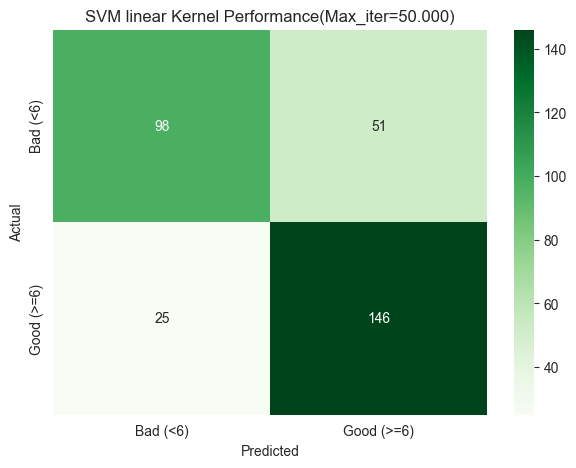

In [19]:
#We print the metrics for the SVM Linear without Grid Search
y_pred_linear = svm_linear.predict(X_test_scaled)
y_prob_linear = svm_linear.predict_proba(X_test_scaled)[:,1]

acc_linear = accuracy_score(y_test, y_pred_linear)
f1_linear = f1_score(y_test, y_pred_linear)
roc_auc_linear = roc_auc_score(y_test, y_prob_linear) #We Use Probabilities  for the ROC-AUC

print(f"--- SVM Linear Performance ---")
print(f"Accuracy: {acc_linear:.4f}")
print(f"F1-Score: {f1_linear:.4f}")
print(f"ROC AUC:  {roc_auc_linear:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear, target_names=['Bad (<6)', 'Good (>=6)']))


cm_linear = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Bad (<6)', 'Good (>=6)'],
            yticklabels=['Bad (<6)', 'Good (>=6)'])

plt.title('SVM linear Kernel Performance(Max_iter=50.000)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [20]:
#Testing for Overfitting
y_train_pred_lin = svm_linear.predict(X_train_scaled)
y_test_pred_lin = svm_linear.predict(X_test_scaled)


print(f"Accuracy on Train Set: {accuracy_score(y_train, y_train_pred_lin):.4f}")
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_test_pred_lin):.4f}")

Accuracy on Train Set: 0.7357
Accuracy on Test Set: 0.7625



### 2. SVM RBF


In [21]:
# SVM and kernel RBF
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


--- SVM RBF Performance ---
Accuracy: 0.5406
F1-Score: 0.6994
ROC AUC:  0.3471

Classification Report:
              precision    recall  f1-score   support

    Bad (<6)       1.00      0.01      0.03       149
  Good (>=6)       0.54      1.00      0.70       171

    accuracy                           0.54       320
   macro avg       0.77      0.51      0.36       320
weighted avg       0.75      0.54      0.39       320



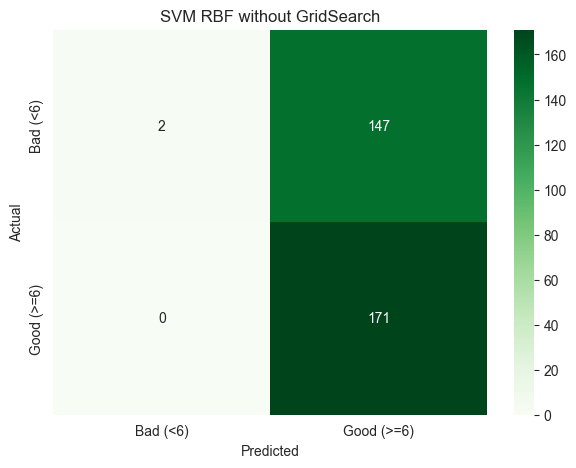

In [22]:
y_pred_rbf = svm_rbf.predict(X_test_scaled)
y_prob_rbf = svm_rbf.predict_proba(X_test_scaled)[:,1]

acc_rbf = accuracy_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)
roc_auc_rbf = roc_auc_score(y_test, y_prob_rbf)

print(f"--- SVM RBF Performance ---")
print(f"Accuracy: {acc_rbf:.4f}")
print(f"F1-Score: {f1_rbf:.4f}")
print(f"ROC AUC:  {roc_auc_rbf:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf, target_names=['Bad (<6)', 'Good (>=6)']))


cm_rbf = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Bad (<6)', 'Good (>=6)'],
            yticklabels=['Bad (<6)', 'Good (>=6)'])

plt.title('SVM RBF without GridSearch')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



In [23]:
#Testing for Overfitting
y_train_pred_rbf = svm_rbf.predict(X_train_scaled)
y_test_pred_rbf = svm_rbf.predict(X_test_scaled)


print(f"Accuracy on Train Set: {accuracy_score(y_train, y_train_pred_rbf):.4f}")
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_test_pred_rbf):.4f}")



Accuracy on Train Set: 0.5371
Accuracy on Test Set: 0.5406


### SVM RBF with GridSearch

In [24]:
#Implementing a Grid Search for the parameters because the  SVM has a very low performance
from sklearn.model_selection import GridSearchCV

#Trying Different Parameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 100, 10, 0.1, 0.01, 0.001],

}

# We use  f1_weighted as a metric to find best balance
grid = GridSearchCV(
    SVC(probability=True, class_weight='balanced'),
    param_grid,
    cv=10,
    scoring='f1_weighted',
    verbose=1
)

grid.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid.best_params_}")
best_predictions = grid.predict(X_test_scaled)
best_probabilities = grid.predict_proba(X_test_scaled)[:, 1]


print(classification_report(y_test, best_predictions))
acc_best_pred = accuracy_score(y_test, best_predictions)
f1_best_pred = f1_score(y_test, best_predictions)
roc_auc_best_pred = roc_auc_score(y_test, best_probabilities)

print(f"--- SVM RBF with GridSearch ---")
print(f"Accuracy: {acc_best_pred:.4f}")
print(f"F1-Score: {f1_best_pred:.4f}")
print(f"ROC AUC:  {roc_auc_best_pred:.4f}")


Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best Parameters: {'C': 10, 'gamma': 0.1}
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       149
           1       0.83      0.71      0.77       171

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.78      0.77      0.77       320

--- SVM RBF with GridSearch ---
Accuracy: 0.7688
F1-Score: 0.7673
ROC AUC:  0.8438


In [25]:
#Testing for Overfitting
y_train_best_pred_rbf = grid.predict(X_train_scaled)
y_test_best_pred_rbf = grid.predict(X_test_scaled)


print(f"Accuracy on Train Set: {accuracy_score(y_train, y_train_best_pred_rbf):.4f}")
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_test_best_pred_rbf):.4f}")

Accuracy on Train Set: 0.8546
Accuracy on Test Set: 0.7688


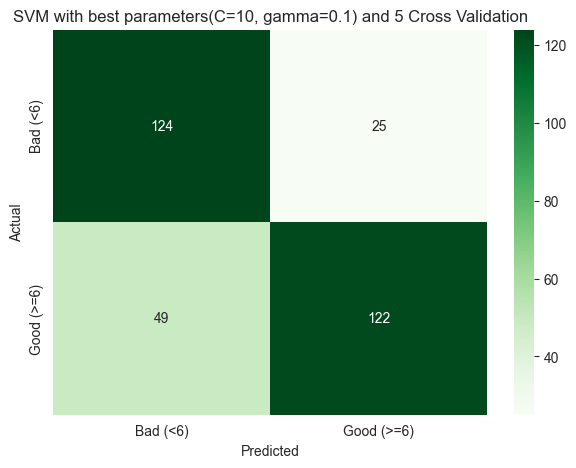

In [26]:
cm_best_pred = confusion_matrix(y_test, best_predictions)


plt.figure(figsize=(7, 5))
sns.heatmap(cm_best_pred, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Bad (<6)', 'Good (>=6)'],
            yticklabels=['Bad (<6)', 'Good (>=6)'])

plt.title('SVM with best parameters(C=10, gamma=0.1) and 5 Cross Validation')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 3.Decision Tree

In [27]:
# Trying different depths in the tree, Here we DO NOT use the Scaled Data since the decision trees can handle unscaled data
for depth in [3, 5, 7, 9, None]:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    print(f"Depth: {depth} -> Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")

Depth: 3 -> Accuracy: 0.6875
Depth: 5 -> Accuracy: 0.7219
Depth: 7 -> Accuracy: 0.7469
Depth: 9 -> Accuracy: 0.7469
Depth: None -> Accuracy: 0.7500


In [28]:
param_grid_dt = {
    'max_depth': [3, 5, 7, 9],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='f1_weighted')
grid_dt.fit(X_train, y_train)

print(f"Best DT Params: {grid_dt.best_params_}")
best_dt = grid_dt.best_estimator_

Best DT Params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 2}


In [29]:
#Because we suggest max depth=None we try to see if the model is overfitting
y_train_pred_dt = best_dt.predict(X_train)
y_test_pred_dt = best_dt.predict(X_test)


print(f"Accuracy on Train Set: {accuracy_score(y_train, y_train_pred_dt):.4f}")
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_test_pred_dt):.4f}")

Accuracy on Train Set: 0.9085
Accuracy on Test Set: 0.7406


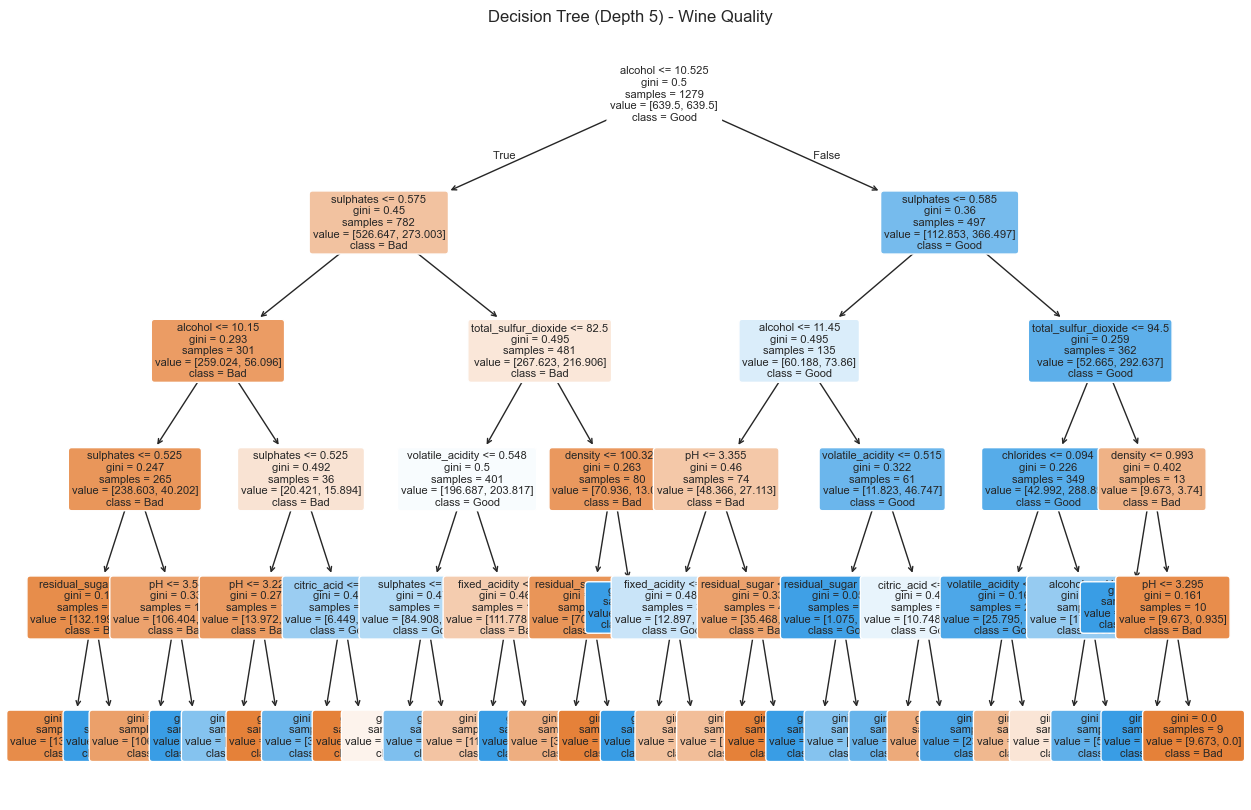

In [30]:
# Trying a Decision Tree with Max Depth=5
simple_dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
simple_dt.fit(X_train, y_train)
simple_dt_train_pred = simple_dt.predict(X_train)
simple_dt_test_pred = simple_dt.predict(X_test)





# Making the tree Plot
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(simple_dt,
          feature_names=X.columns,
          class_names=['Bad', 'Good'],
          filled=True,
          rounded=True,
          fontsize=8)
plt.title("Decision Tree (Depth 5) - Wine Quality ")
plt.show()

Accuracy on Train Set: 0.7952
Accuracy on Test Set: 0.7281
              precision    recall  f1-score   support

           0       0.66      0.86      0.75       149
           1       0.83      0.61      0.71       171

    accuracy                           0.73       320
   macro avg       0.75      0.74      0.73       320
weighted avg       0.75      0.73      0.73       320

Decision Tree Max Depth=5
Accuracy: 0.7281
F1-Score: 0.7071
ROC AUC:  0.7365


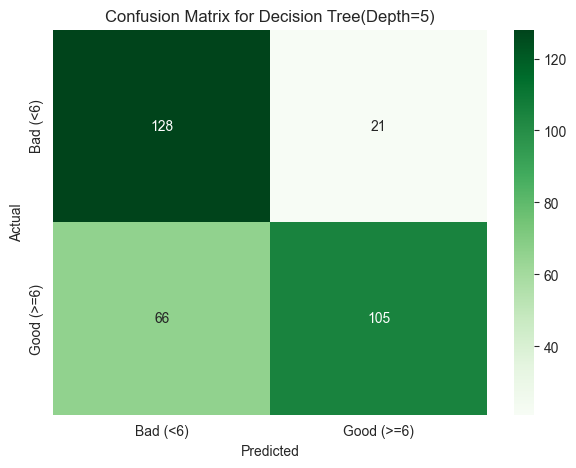

In [31]:
cm_best_pred_dt = confusion_matrix(y_test, simple_dt_test_pred)

print(f"Accuracy on Train Set: {accuracy_score(y_train, simple_dt_train_pred):.4f}")
print(f"Accuracy on Test Set: {accuracy_score(y_test, simple_dt_test_pred):.4f}")

print(classification_report(y_test, simple_dt_test_pred))
acc_simple_dt = accuracy_score(y_test, simple_dt_test_pred)
f1_simple_dt = f1_score(y_test, simple_dt_test_pred)
roc_auc_simple_dt = roc_auc_score(y_test, simple_dt_test_pred)

print(f"Decision Tree Max Depth=5")
print(f"Accuracy: {acc_simple_dt:.4f}")
print(f"F1-Score: {f1_simple_dt:.4f}")
print(f"ROC AUC:  {roc_auc_simple_dt:.4f}")



plt.figure(figsize=(7, 5))
sns.heatmap(cm_best_pred_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Bad (<6)', 'Good (>=6)'],
            yticklabels=['Bad (<6)', 'Good (>=6)'])

plt.title('Confusion Matrix for Decision Tree(Depth=5)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Visual Comparison of the  Models

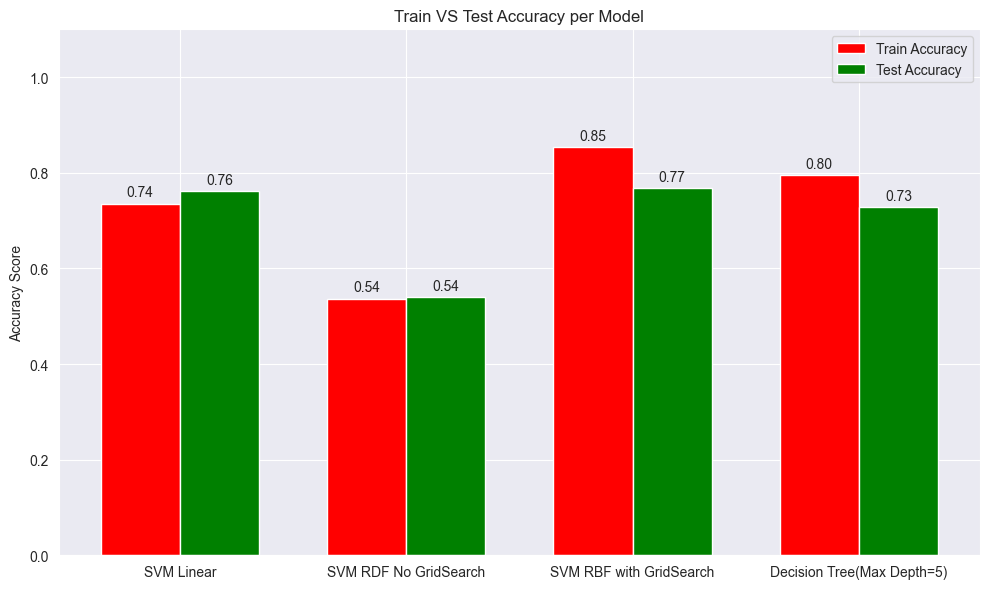

In [49]:
# Comparing the  Models with a Barplot
models = ['SVM Linear','SVM RDF No GridSearch','SVM RBF with GridSearch', 'Decision Tree(Max Depth=5)']
train_acc = [0.7357,0.5371,0.8546 ,0.7952 ] # The Training set values
test_acc = [0.7625,0.5406,0.7688,0.7281 ]  # The Test set values

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_acc, width, label='Train Accuracy', color='red')
rects2 = ax.bar(x + width/2, test_acc, width, label='Test Accuracy', color='green')

# Adding Labels
ax.set_ylabel('Accuracy Score')
ax.set_title('Train VS Test Accuracy per Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim(0, 1.1)

# This function puts labels over the Barplot
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


plt.tight_layout()
plt.show()

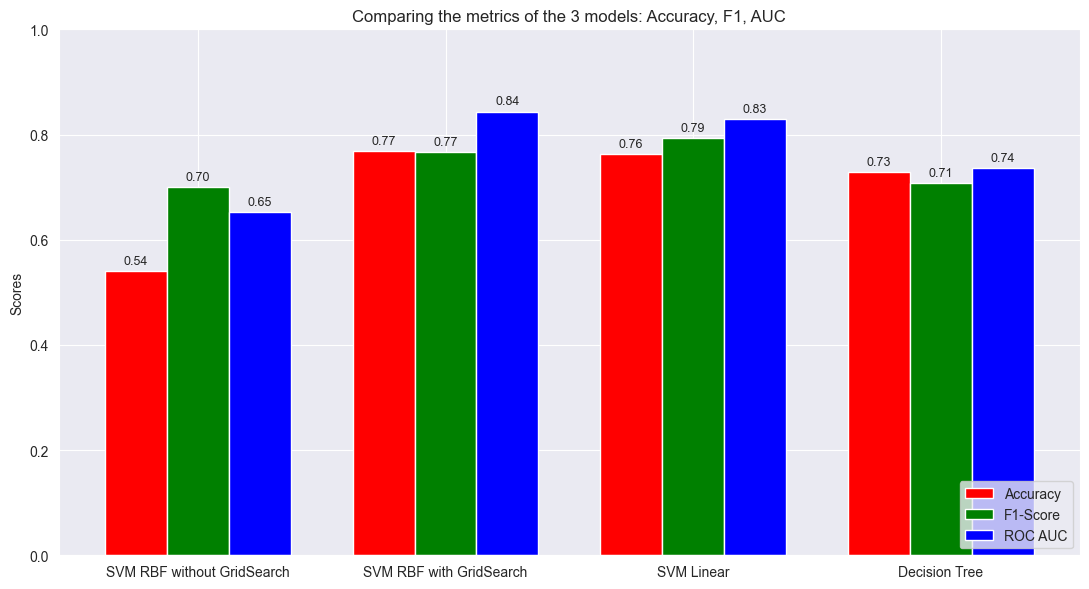

In [52]:


# Importing the data we found
models = ['SVM RBF without GridSearch','SVM RBF with GridSearch', 'SVM Linear', 'Decision Tree']
accuracy = [0.5406,0.7688, 0.7625, 0.7281]
f1_scores = [0.6994,0.7673, 0.7935, 0.7071]
auc_scores = [0.6529,0.8438, 0.8292, 0.7365]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(11, 6))


rects1 = ax.bar(x - width, accuracy, width, label='Accuracy', color='red')
rects2 = ax.bar(x, f1_scores, width, label='F1-Score', color='green')
rects3 = ax.bar(x + width, auc_scores, width, label='ROC AUC', color='blue')

ax.set_ylabel('Scores')
ax.set_title('Comparing the metrics of the 3 models: Accuracy, F1, AUC')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='lower right')
ax.set_ylim(0, 1.0)

# Here we add the labels over the Barplot
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

# PCA

Individual Variance (%):
[25.27 16.92 12.73 11.26  9.75  6.7   5.33  4.69  3.18  2.84  1.34]


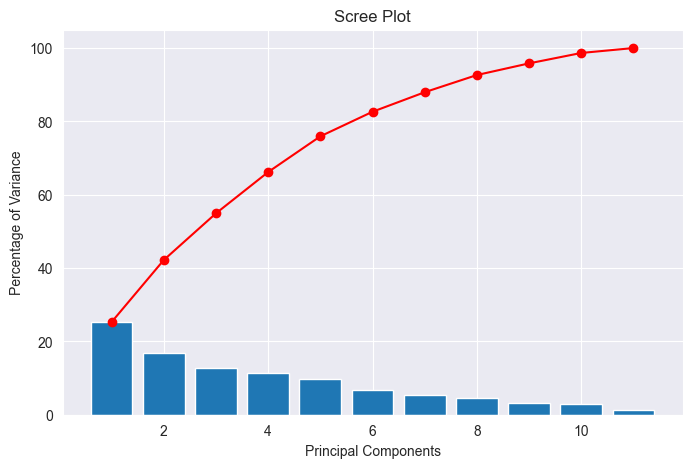

In [47]:

from sklearn.preprocessing import StandardScaler


# Using  StandardScaler (Mean=0, Std=1)

scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X_train_scaled)


pca = PCA()
pca.fit(X_std)

#
print("Individual Variance (%):")
print(np.round(pca.explained_variance_ratio_ * 100, 2))

# 5. Scree Plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, 12), pca.explained_variance_ratio_ * 100)
plt.plot(range(1, 12), np.cumsum(pca.explained_variance_ratio_ * 100), marker='o', color='red')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variance')
plt.show()

# Conclusions
- From the 2 SVM models, the **_SVM LINEAR and the  SVM RBF(GridSearch) have similar performance_**. The model SVM RΒF without GridSearch, had a terrible performance showing the importance of finding the best parameters. Although the accuracy in the Training Data is greater in **_SVM RBF, it has a little indication of Overfitting_**. **_The ROC AUC at the SVM LINEAR is the same as the SVM RBF(GridSearch)_**. The other metrics(F1 score and Accuracy) are quite close. Also, this is an indication that the features have a small linear correlation as we suspected from the Correlation Matrix in the MultiVariate Analysis.

- **_The Decision Tree had the lowest performance_**,not bad,but the lowest from 3 models. When we were searching for the best parameters in the decision tree, the model suggested MAX DEPTH=None, but we saw we had overfitting, so we chose MAX DEPTH=5 .But the diagram of the Tree Plot was useful to identify the features that have greater importance e.g.alcohol as the root of the tree

- Overall we can say the SVM RBF with GridSearch had the highest performance as a classifier, but the SVM Linear was more balanced and stable

-  **PCA with RobustScaler**:Because the RobustScaler scales data based on the IQR rather than the total variance, it does not force all features to have a unit variance of 1.Consequently, features with extreme numerical ranges and high variance (such as total sulfur dioxide) continued to dominate the Principal Components. This led to a Scree Plot where a single component appeared to explain nearly 100% of the variance.So we imported StandardScaler

- **PCA**:  After applying StandardScaler to normalize the features, the PCA revealed a balanced distribution of variance. The first principal component (PC1) accounts for 25.27%, while the first six components together explain approximately 82.7% of the total variance. This confirms that the quality of red wine is a multidimensional problem that cannot be simplified into just one or two chemical factors. The gradual decline in the Scree Plot justifies our decision to use all features for the SVM and Decision Tree models, as a significant amount of information is spread across the first six dimensions.